In [107]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

In [108]:
brts_data = pd.read_csv('GetBRTS_CITYBUSData.csv')

In [109]:
brts_data.describe()

,No_of_buses_MTS,No_of_passerngers_travel_MTS,No_of_buses_BRTS,No_of_passerngers_travel_BRTS
count,615.000000,599.000000,616.000000,604.000000
mean,273.795122,77664.759599,150.139610,82962.620861
std,79.960965,20641.838371,35.907741,15442.504135
min,40.000000,56.000000,49.000000,10044.000000
25%,220.000000,60714.000000,120.000000,74554.000000
50%,246.000000,79629.000000,130.000000,84176.000000
75%,324.000000,89952.000000,176.000000,92364.250000
max,434.000000,133809.000000,210.000000,121169.000000


In [110]:
brts_data.head()

,CityName,Date,No_of_buses_MTS,No_of_passerngers_travel_MTS,No_of_buses_BRTS,No_of_passerngers_travel_BRTS
0,Surat,23/06/2017,185.0,51797.0,120.0,76700.0
1,Surat,24/06/2017,187.0,51174.0,120.0,80799.0
2,Surat,25/06/2017,187.0,47270.0,120.0,84081.0
3,Surat,26/06/2017,178.0,54139.0,120.0,89429.0
4,Surat,27/06/2017,187.0,54289.0,120.0,82321.0


In [111]:
brts_data.tail()

,CityName,Date,No_of_buses_MTS,No_of_passerngers_travel_MTS,No_of_buses_BRTS,No_of_passerngers_travel_BRTS
1059,Surat,17/05/2020,393.0,60714.0,207.0,61357.0
1060,Surat,18/05/2020,393.0,60714.0,207.0,61357.0
1061,Surat,19/05/2020,393.0,60714.0,207.0,61357.0
1062,Surat,20/05/2020,393.0,60714.0,207.0,61357.0
1063,Surat,21/05/2020,393.0,60714.0,207.0,61357.0


In [112]:
brts_data['Date']=pd.to_datetime(brts_data['Date'])

In [113]:
brts_data['Month'] = brts_data['Date'].dt.month

In [114]:
brts_data['Year'] = brts_data['Date'].dt.year

In [115]:
brts_data.head()

,CityName,Date,No_of_buses_MTS,No_of_passerngers_travel_MTS,No_of_buses_BRTS,No_of_passerngers_travel_BRTS,Month,Year
0,Surat,2017-06-23,185.0,51797.0,120.0,76700.0,6,2017
1,Surat,2017-06-24,187.0,51174.0,120.0,80799.0,6,2017
2,Surat,2017-06-25,187.0,47270.0,120.0,84081.0,6,2017
3,Surat,2017-06-26,178.0,54139.0,120.0,89429.0,6,2017
4,Surat,2017-06-27,187.0,54289.0,120.0,82321.0,6,2017


In [116]:
brts_data.dropna(inplace=True)

(array([736503., 736504., 736505., 736506., 736507., 736508., 736509.,
        736510.]),
 <a list of 8 Text major ticklabel objects>)

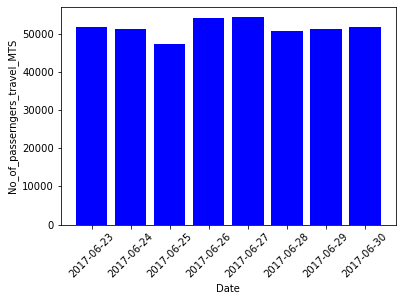

In [117]:
mon=6
yea=2017
X=brts_data[(brts_data['Month']==mon) & (brts_data['Year']==yea)]
plt.bar(X['Date'][0:8],X['No_of_passerngers_travel_MTS'][0:8],color='b')
plt.xlabel('Date')
plt.ylabel('No_of_passerngers_travel_MTS')
plt.xticks(rotation=45)

In [118]:
brts_data['Month-Year']=brts_data['Month'].astype('str')+ ' ' +brts_data['Year'].astype('str')

In [119]:
brts_data.head()

,CityName,Date,No_of_buses_MTS,No_of_passerngers_travel_MTS,No_of_buses_BRTS,No_of_passerngers_travel_BRTS,Month,Year,Month-Year
0,Surat,2017-06-23,185.0,51797.0,120.0,76700.0,6,2017,6 2017
1,Surat,2017-06-24,187.0,51174.0,120.0,80799.0,6,2017,6 2017
2,Surat,2017-06-25,187.0,47270.0,120.0,84081.0,6,2017,6 2017
3,Surat,2017-06-26,178.0,54139.0,120.0,89429.0,6,2017,6 2017
4,Surat,2017-06-27,187.0,54289.0,120.0,82321.0,6,2017,6 2017


In [120]:
month_year_group=brts_data.groupby('Month-Year').mean()
month_year_group

,No_of_buses_MTS,No_of_passerngers_travel_MTS,No_of_buses_BRTS,No_of_passerngers_travel_BRTS,Month,Year
Month-Year,,,,,,
1 2017,200.166667,56278.166667,122.666667,79401.500000,1,2017
1 2018,229.000000,83846.105263,124.000000,83501.789474,1,2018
1 2019,314.000000,84616.000000,181.000000,65433.000000,1,2019
1 2020,395.363636,102328.818182,203.363636,93342.181818,1,2020
10 2017,202.333333,60726.500000,120.666667,68762.222222,10,2017
10 2018,233.750000,85955.875000,132.750000,90253.875000,10,2018
10 2019,315.000000,65368.000000,162.000000,60560.500000,10,2019
10 2020,380.250000,77977.500000,199.250000,75622.500000,10,2020
11 2017,222.208333,75843.250000,121.250000,81165.833333,11,2017


In [121]:
sort_1=month_year_group.sort_values('No_of_passerngers_travel_BRTS',ascending = False)
sort_1

,No_of_buses_MTS,No_of_passerngers_travel_MTS,No_of_buses_BRTS,No_of_passerngers_travel_BRTS,Month,Year
Month-Year,,,,,,
2 2020,406.681818,104933.772727,204.045455,95915.045455,2,2020
2 2019,320.000000,101229.000000,174.000000,95026.000000,2,2019
8 2018,236.423077,89602.615385,140.384615,94442.730769,8,2018
1 2020,395.363636,102328.818182,203.363636,93342.181818,1,2020
12 2019,348.450000,100739.800000,181.350000,92305.250000,12,2019
11 2019,387.600000,107995.700000,193.850000,91338.200000,11,2019
9 2018,228.884615,82619.076923,142.653846,91029.461538,9,2018
10 2018,233.750000,85955.875000,132.750000,90253.875000,10,2018
4 2019,296.500000,88179.500000,162.500000,89998.500000,4,2019


In [122]:
print(sort_1.index)

Index(['2 2020', '2 2019', '8 2018', '1 2020', '12 2019', '11 2019', '9 2018',
       '10 2018', '4 2019', '5 2018', '7 2018', '11 2018', '8 2017', '6 2018',
       '12 2018', '5 2019', '9 2019', '6 2020', '6 2019', '4 2018', '12 2017',
       '1 2018', '4 2017', '8 2019', '3 2018', '2 2018', '9 2017', '11 2017',
       '9 2020', '2 2017', '7 2017', '1 2017', '12 2020', '6 2017', '8 2020',
       '7 2020', '10 2020', '3 2017', '3 2019', '11 2020', '10 2017', '5 2017',
       '3 2020', '7 2019', '1 2019', '4 2020', '5 2020', '10 2019'],
      dtype='object', name='Month-Year')


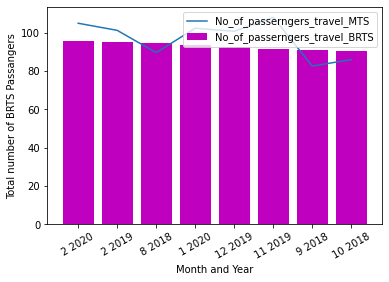

In [123]:
plt.bar(sort_1.index[0:8],(sort_1['No_of_passerngers_travel_BRTS'][0:8])/1000,color='m')
plt.plot(sort_1.index[0:8],(sort_1['No_of_passerngers_travel_MTS'][0:8])/1000)
plt.xticks(rotation=30)
plt.xlabel('Month and Year')
plt.ylabel('Total number of BRTS Passangers')
plt.legend(['No_of_passerngers_travel_MTS','No_of_passerngers_travel_BRTS'])
plt.show()

## Busses are crowdy during winter in Surat

In [124]:
#Next Problem

In [125]:
sort_2=month_year_group.sort_values('No_of_buses_BRTS',ascending = False)
sort_2.head()

,No_of_buses_MTS,No_of_passerngers_travel_MTS,No_of_buses_BRTS,No_of_passerngers_travel_BRTS,Month,Year
Month-Year,,,,,,
12 2020,403.750000,85016.500000,207.000000,79156.000000,12,2020
3 2020,391.217391,68338.086957,205.521739,67082.347826,3,2020
4 2020,386.090909,63638.909091,204.181818,65193.090909,4,2020
2 2020,406.681818,104933.772727,204.045455,95915.045455,2,2020
8 2020,399.600000,81943.800000,203.800000,75881.200000,8,2020


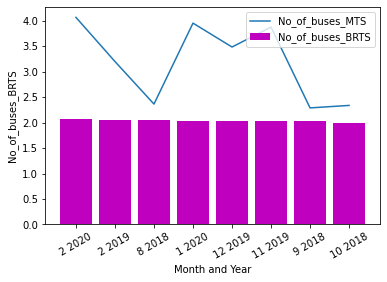

In [126]:
plt.bar(sort_1.index[0:8],(sort_2['No_of_buses_BRTS'][0:8])/100,color='m')
plt.plot(sort_1.index[0:8],(sort_1['No_of_buses_MTS'][0:8])/100)
plt.xticks(rotation=30)
plt.xlabel('Month and Year')
plt.ylabel('No_of_buses_BRTS')
plt.legend(['No_of_buses_MTS','No_of_buses_BRTS'])
plt.show()

# Administration does good work in surat as the number of busses were more when number of people travelling in the bus increased